Author: Tony Malayil

Date: May 29, 2024

CAP 4613 - 001

a) Use the MNIST function in keras.datasets to load and split the MNIST dataset into the training and testing sets. Name the sets as x_train, y_train, and x_test, y_test. Print the following: The number of images in each training and testing set and the image width and height.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("X_train size is", x_train.shape[0])
print("Y_train size is", y_train.shape[0])
print("X_test size is", x_test.shape[0])
print("Y_test size is", y_test.shape[0])

print("Image width and height size is", x_train.shape[1],"x", x_train.shape[2])

11490434/11490434 [==============================] - 0s 0us/step
X_train size is 60000
Y_train size is 60000
X_test size is 10000
Y_test size is 10000
Image width and height size is 28 x 28


b) Write a function that takes two inputs: 1) images of ten digits and 2) their corresponding labels and plots a figure with 10 subplots for each 0-9 digits. Each subplot has the number of the handwritten digit in its title.

c) Create a loop to call the function in (b) and plot images from the training set to create a figure that includes all the 10 digits (0-9).

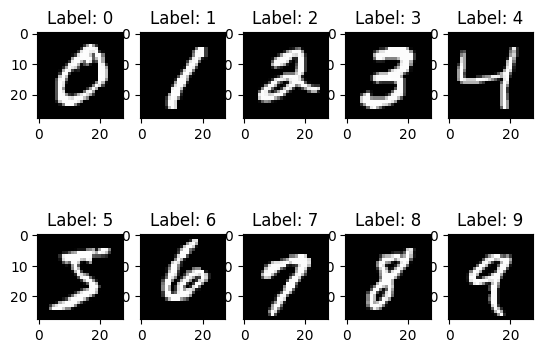

In [47]:
def plotDigits(images, labels):
  plt.figure()
  for n in range(1,11):
    plt.subplot(2,5,n)
    plt.imshow(images[n-1,:,:], cmap='gray')
    plt.title('Label: ' + str(labels[n-1]))
  plt.show()

x_train_i = np.zeros((10, x_train.shape[1], x_train.shape[2]))

for i in range(0,10):
  x_train_d = x_train[y_train==i,:,:]
  x_train_i[i, :, :]=x_train_d[0,:,:]

y_train_i = np.arange(10)

plotDigits(x_train_i, y_train_i)

d) Select the 0 and 8 digits from the training and testing sets and name them: x_train_01, y_train_01 and x_test_01, y_test_01.


e) In machine learning, we typically divide the training set into two training and validation sets to adjust the machine learning model parameters. In your code, randomly select 500 training images and their corresponding labels (from x_train_01 and y_train_01) as the validation set and name them x_valid_01 and y_valid_01, respectively. Name the remaining training images and their labels as x_train_01 and y_train_01, respectively. Note: there are no overlaps between the two sets.

f) Print the number of images in each training, validation, and testing set.

In [48]:
x_train_01 = x_train[np.logical_or(y_train == 0, y_train == 8), :, :]
y_train_01 = y_train[np.logical_or(y_train == 0, y_train == 8)]

x_test_01 = x_test[np.logical_or(y_test == 0, y_test == 8), :, :]
y_test_01 = y_test[np.logical_or(y_test == 0, y_test == 8)]

num_train_img = np.arange(0, x_train_01.shape[0])
train_ind = np.random.permutation(num_train_img)

x_train_01 = x_train_01[train_ind,:,:]
y_train_01 = y_train_01[train_ind]

x_valid_01 = x_train_01[0:500,:,:]
y_valid_01 = y_train_01[0:500]

print("X_valid_01 has a size of", x_valid_01.shape[0], "images, while Y_valid_01 has a size of", y_valid_01.shape[0])

x_train_01 = x_train_01[500:,:,:]
y_train_01 = y_train_01[500:]

print("X_train_01 has a size of", x_train_01.shape[0], "images, while Y_train_01 has a size of", y_train_01.shape[0])

print("X_test has a size of", x_test_01.shape[0], "images, while Y_test has a size of", y_test_01.shape[0])

X_valid_01 has a size of 500 images, while Y_valid_01 has a size of 500
X_train_01 has a size of 11274 images, while Y_train_01 has a size of 11274
X_test has a size of 1954 images, while Y_test has a size of 1954


g) Use the function created in part (b) to plot 10 images from the validation set.

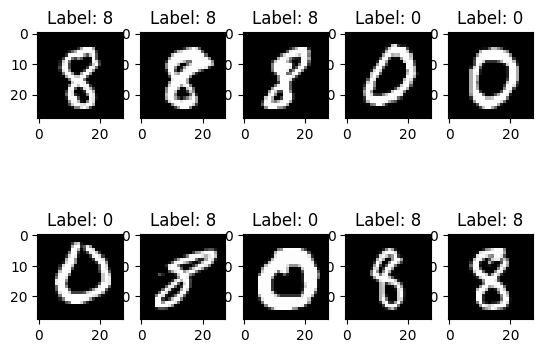

In [49]:
plotDigits(x_valid_01, y_valid_01)

h) Convert each image in the three training, validation, and testing sets to one attribute by calculating the average of all the pixel values in the center 4x4 grid of the image.

In [54]:
x_train_features = np.sum(x_train_01[:, 12:16, 12:16], axis = 2)
x_train_features = np.sum(x_train_features, axis = 1)/16
print(x_train_features.shape)

x_valid_features = np.sum(x_valid_01[:, 12:16, 12:16], axis = 2)
x_valid_features = np.sum(x_valid_features, axis = 1)/16
print(x_valid_features.shape)

x_test_features = np.sum(x_test_01[:, 12:16, 12:16], axis = 2)
x_test_features = np.sum(x_test_features, axis = 1)/16
print(x_test_features.shape)

(11274,)
(500,)
(1954,)


i) Plot the attribute values of the 500 images in the validation set that you calculated in part (h). Use different colors and shapes for 0's and 8's. The x-axis in your figure is the image number (1 to 500), and the y-axis is the calculated attribute. Label the axes and add legends appropriately.

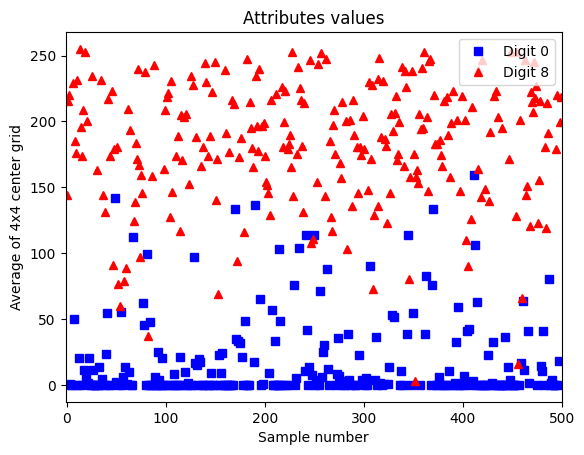

In [59]:
def plotAttribute(feature, label):
  ax = plt.gca()
  ax.set_xlim([-1, 500])
  sample_num = np.arange(feature.shape[0])
  plt.plot( sample_num[label==0], feature[label==0], 'bs',label='Digit 0')
  plt.plot( sample_num[label==8], feature[label==8], 'r^',label='Digit 8')
  plt.legend()
  plt.xlabel('Sample number')
  plt.ylabel('Average of 4x4 center grid')
  plt.title('Attributes values')
  plt.show()

plotAttribute(x_valid_features, y_valid_01)

j) Based on your observation from the plot (i.e., validation set), guess a threshold on the attribute you think would differentiate the two classes with the highest accuracy.

**The threshold that I guessed to have the highest accuracy was 100**

k) Calculate the training, validation, and testing accuracies based on the selected threshold on the corresponding sets and print them.

In [60]:
def calcAccuracy(feature, label, thres):
  accurate = 0
  digitA = 8
  digitB = 0

  for n in range(feature.shape[0]):
    if feature[n] >= thres and label[n] == digitA:
      accurate += 1
    if feature[n] < thres and label[n] == digitB:
      accurate += 1

  accuracy = accurate / feature.shape[0]
  print("Classification accuracy is {acc:.2f}%".format(acc = accuracy*100))

thy = 100

print("Training Accuracy:")
calcAccuracy(x_train_features, y_train_01, thy)
print("\nValidation Accuracy:")
calcAccuracy(x_valid_features, y_valid_01, thy)
print("\nTest Accuracy:")
calcAccuracy(x_test_features, y_test_01, thy)

Training Accuracy:
Classification accuracy is 93.71%

Validation Accuracy:
Classification accuracy is 94.60%

Test Accuracy:
Classification accuracy is 95.65%
